<h1><center><b>Machine Learning</b></center></h1>
<h3><center>Exercise 4</center></h3>
<h4><center>K-Means and PCA<center></h4>

*Your* Name:  
<font color='red'>
FirstName1 LastName1, 123456789   
</font>


**Instructions:**
- Create a copy of this notebook and implement your code in it.
- Make sure you don't leave empty cells or empty answers.
- You should not change the code we provided you.
To Download the notebook go to **"File"** -> **"Download .ipynb"**.  
- Submit deadline: 4/7/2024 at 23:59

## Part 1 - K-Means (35%)

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### **2. Data**

### **2.1 Convex Data**

Generate a convex 2D dataset

In [2]:
## Generate 2D data
X_convex = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X_convex)

print(X_convex.shape)


(2000, 2)


Plot the a convex 2D dataset to explore how many clusters it contains

In [ ]:
plt.title("Convex Dataset")
plt.scatter(X_convex[:, 0], X_convex[:, 1], cmap='viridis')

### **2.2 Non-Convex Data**

Generate a non-convex 2D dataset

In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X_non_convex, y = make_moons(n_samples=300, noise=0.05, random_state=42)


Plot the non convex 2D dataset to explore how many clusters it contains

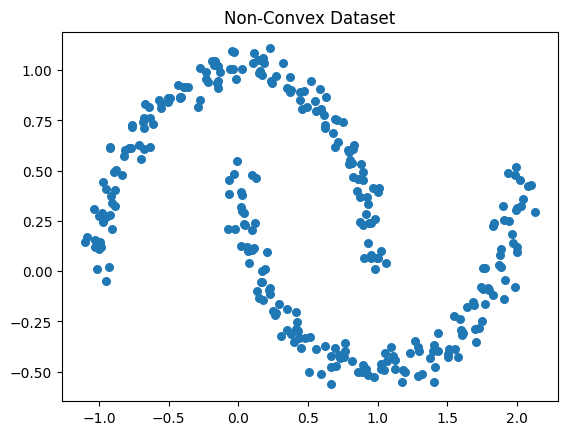

In [5]:
plt.scatter(X_non_convex[:, 0], X_non_convex[:, 1], s=30)
plt.title("Non-Convex Dataset")
plt.show()

### **3. K-Means**

Implement the algorithm

In [6]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.


    def fit(self, X):
        #### YOUR CODE HERE ####
        self.X_fit_ = X
        n_samples, n_features = X.shape


        rng = np.random.default_rng()
        random_indices = rng.choice(n_samples, size=self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iter):

            labels = self._get_labels(X)

            centroids = self._get_centroids(X, labels)

            cost = self._calculate_cost(X)


            self.labels_history.append(labels)
            self.centroids_history.append(self.centroids.copy())
            self.costs.append(cost)


            if np.allclose(self.centroids, centroids):
                break

            self.centroids = centroids

        self.labels_ = labels

    def predict(self, X):
        #### YOUR CODE HERE ####
        return self._get_labels(X)

    def _get_distances(self, X):
        #### YOUR CODE HERE ####
        dists = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return dists

    def _get_labels(self, X):
        #### YOUR CODE HERE ####
        distances = self._get_distances(X)
        labels = np.argmin(distances, axis=1)
        return labels

    def _get_centroids(self, X, labels):
        #### YOUR CODE HERE ####
        centroids = np.array([
        X[labels == i].mean(axis=0) if np.any(labels == i) else self.centroids[i]
        for i in range(self.n_clusters)
        ])
        return centroids

    def _calculate_cost(self, X):
        #### YOUR CODE HERE ####
        distances = self._get_distances(X)
        closest = np.min(distances, axis=1)
        cost = np.sum(closest ** 2)
        return cost

### **3.1 K-Means Using Convex Data**

Run the algorithm on the 2D convex dataset

In [7]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_convex)
print("Final cost:", kmeans.costs[-1])

Final cost: 3995.7440684864587


Plot a graph of the costs as a function of the iterations

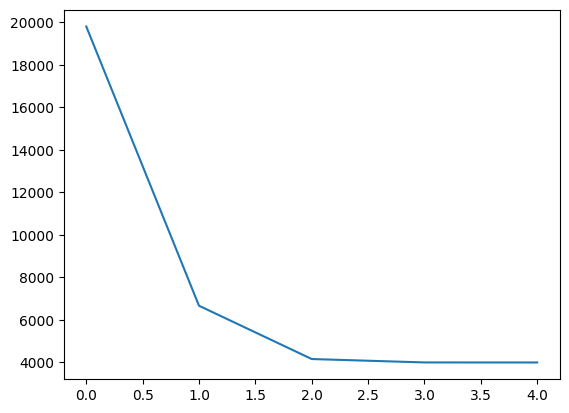

In [8]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 16421.387348005584 <br>
3 clusters: 9731.75508361431 <br>
4 clusters: 3874.2038277269676 <br>
6 clusters: 3229.2682728983086 <br>
8 clusters: 2674.74480202931 <br>
10 clusters: 2315.624445190432 <br>
20 clusters: 1171.5659227158394 <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

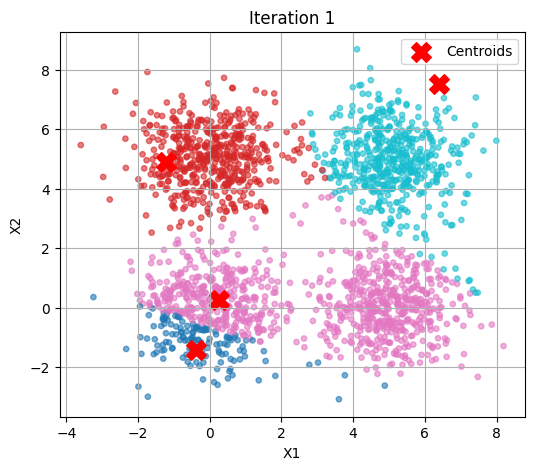

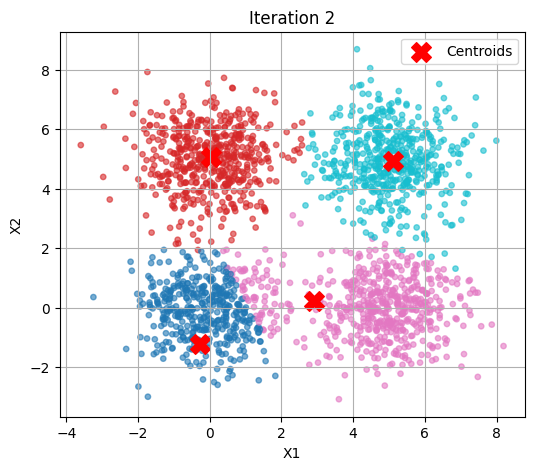

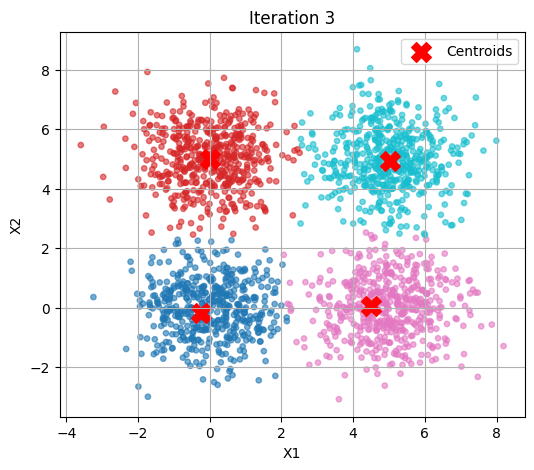

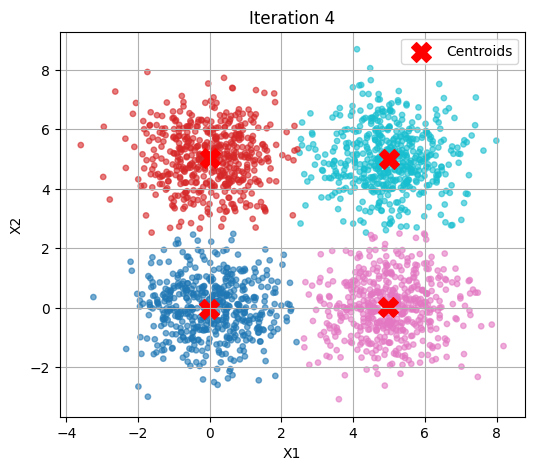

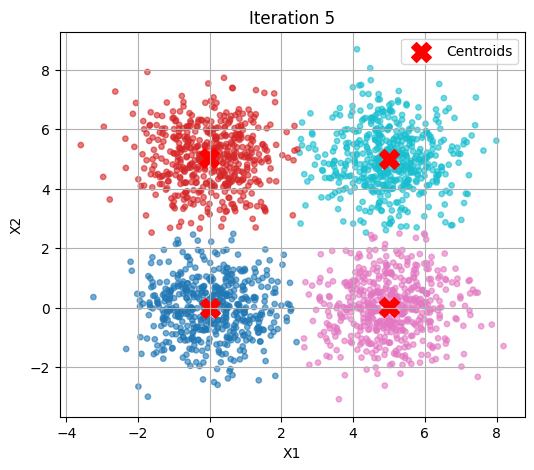

In [9]:
########################
#### YOUR CODE HERE ####
########################
def plot_kmeans_iterations(kmeans, X):
    n_iter = len(kmeans.centroids_history)

    for i in range(n_iter):
        plt.figure(figsize=(6, 5))
        labels = kmeans.labels_history[i]
        centroids = kmeans.centroids_history[i]


        plt.scatter(X[:, 0], X[:, 1], c=labels, s=15, cmap='tab10', alpha=0.6)


        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

        plt.title(f"Iteration {i+1}")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.legend()
        plt.grid(True)
        plt.show()
plot_kmeans_iterations(kmeans, X_convex)

### **3.1 K-Means Using Non-Convex Data**

Run the algorithm on the 2D non-convex dataset

In [10]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_non_convex)
print("Final cost:", kmeans.costs[-1])

Final cost: 52.45590872090601


Plot a graph of the costs as a function of the iterations

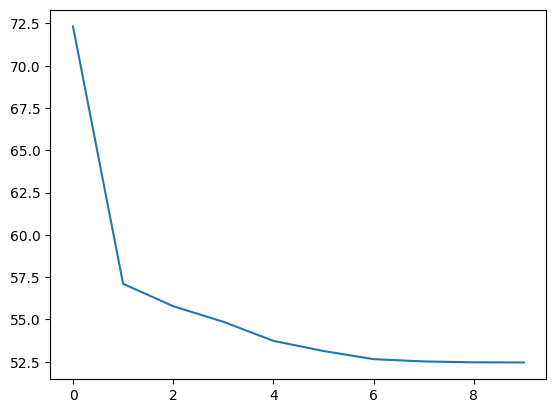

In [11]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: 121.0122397509312 <br>
3 clusters: 81.21950686748022 <br>
4 clusters: 52.44633310207939 <br>
6 clusters: 35.002926099391246 <br>
8 clusters: 19.395849616798422 <br>
10 clusters: 12.194697972739162 <br>
20 clusters: 4.394115307268476 <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

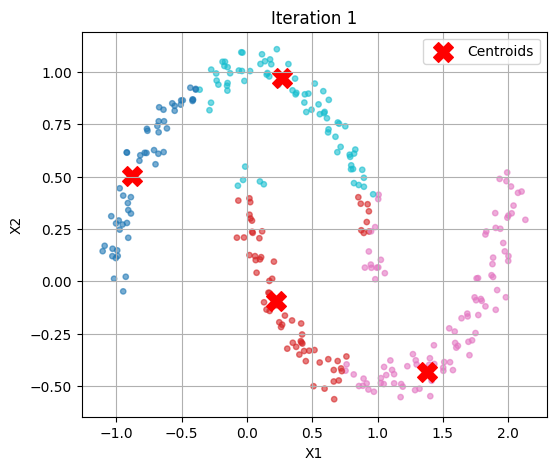

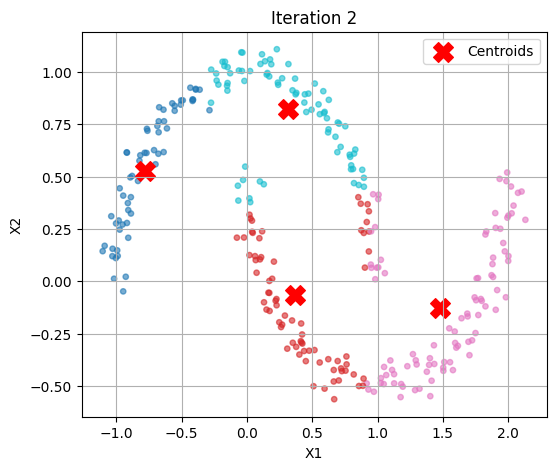

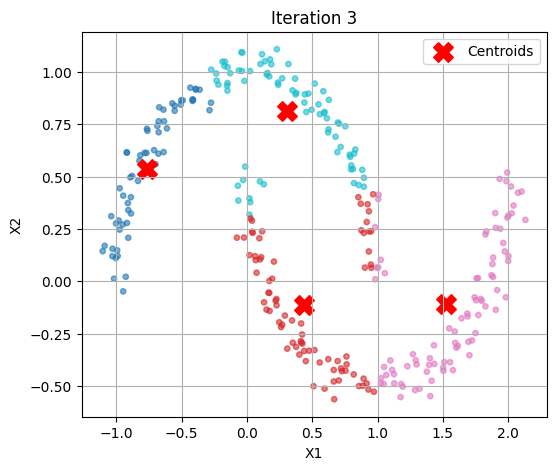

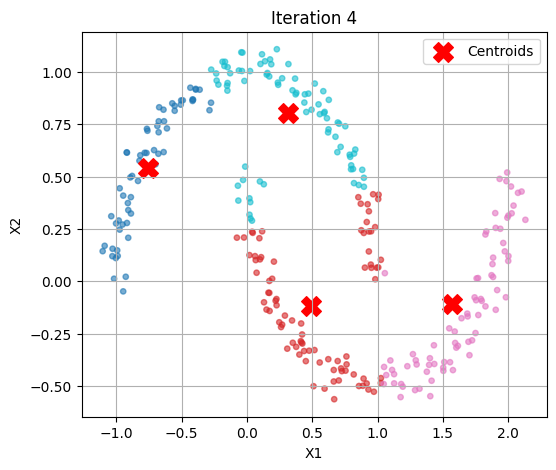

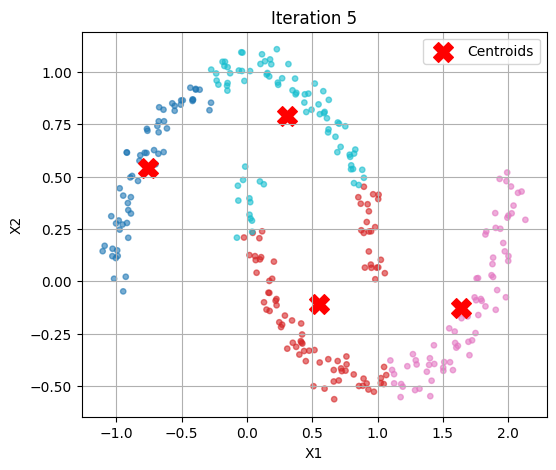

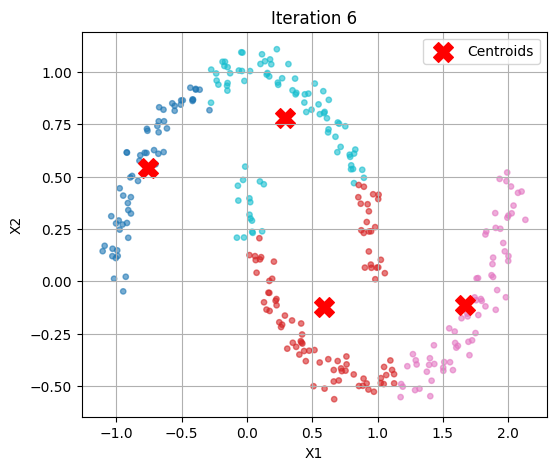

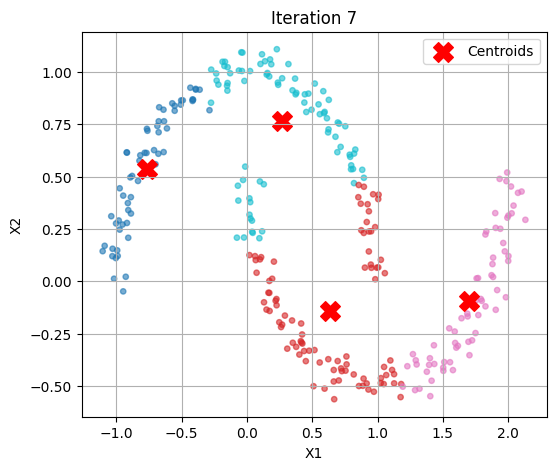

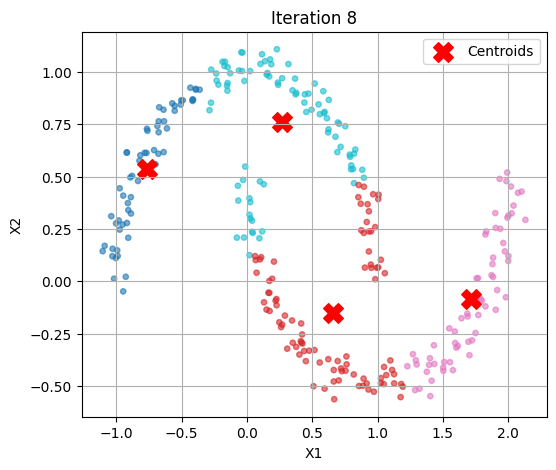

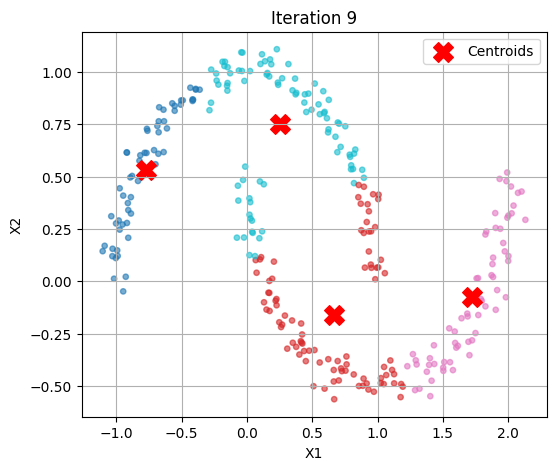

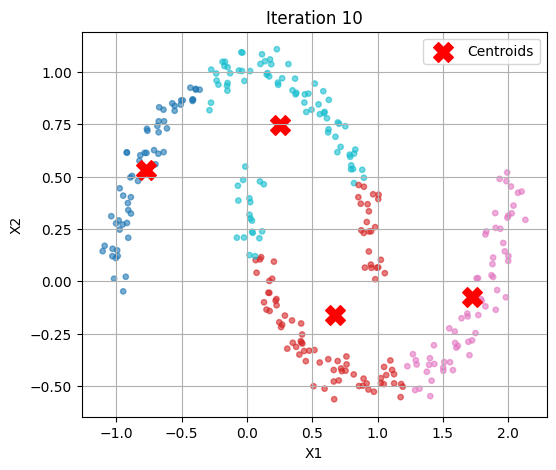

In [12]:
########################
#### YOUR CODE HERE ####
########################
def plot_kmeans_iterations(kmeans, X):
    n_iter = len(kmeans.centroids_history)

    for i in range(n_iter):
        plt.figure(figsize=(6, 5))
        labels = kmeans.labels_history[i]
        centroids = kmeans.centroids_history[i]


        plt.scatter(X[:, 0], X[:, 1], c=labels, s=15, cmap='tab10', alpha=0.6)


        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

        plt.title(f"Iteration {i+1}")
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.legend()
        plt.grid(True)
        plt.show()
plot_kmeans_iterations(kmeans, X_non_convex)

Explain the output of k-means for both datasets. Focus on when k-means successfully classifies the dataset and when it fails. Provide an explanation for why this happens.



**Answer:** The k-means algorithm works based on geometric distances. It checks distances between points and the closest centroid. Associates each point with the closest centroid according to Euclidean distance (straight line). Calculates the center of each group as the geometric mean of all points in it. Therefore, it implicitly assumes that the data is arranged in a circular or convex shape or some uniform layout.<bir>
As you can see, when the data is convex, the data can be divided by straight distances, as the groups are convex – that is, each point within a group is a relatively small distance from the center, and the groups are well separated – there is no overlap or curvature between groups.<bir>
In contrast, in non-convex, it can be seen that the groups are not convex or do not separate in a simple geometric way, as the groups are curved, or wrap around each other, and there are also points that are closer to the center of an incorrect group – even though they belong to another group. K-Means cuts the space with straight lines, therefore creating a wrong division.


## Part 2 - PCA (35%)

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [13]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [14]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [15]:
import numpy as np

class PCA:
    def __init__(self):
        self.V = None

    def fit(self, X):
        #### YOUR CODE HERE ####
        self.X_fit_ = X
        X_centered = X - np.mean(X, axis=0)
        cov_matrix = np.cov(X_centered, rowvar=False)
        eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)


        sorted_indices = np.argsort(eig_vals)[::-1]
        self.V = eig_vecs[:, sorted_indices]

    def transform(self, X, n_dimentions):
        #### YOUR CODE HERE ####
        X_centered = X - np.mean(X, axis=0)

        V_reduced = self.V[:, :n_dimentions]
        X_reduced = np.dot(X_centered, V_reduced)
        return X_reduced




Run the algorithm on MNIST dataset.

In [16]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

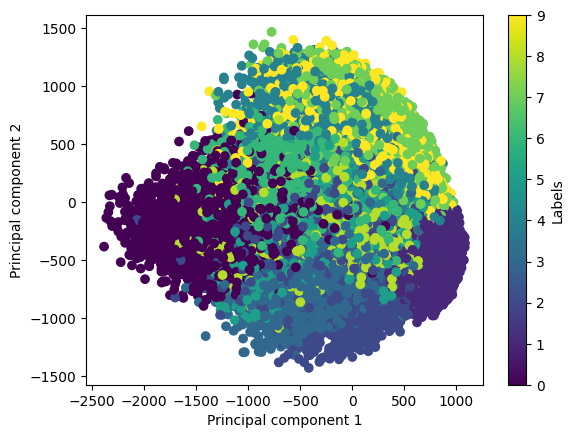

In [17]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

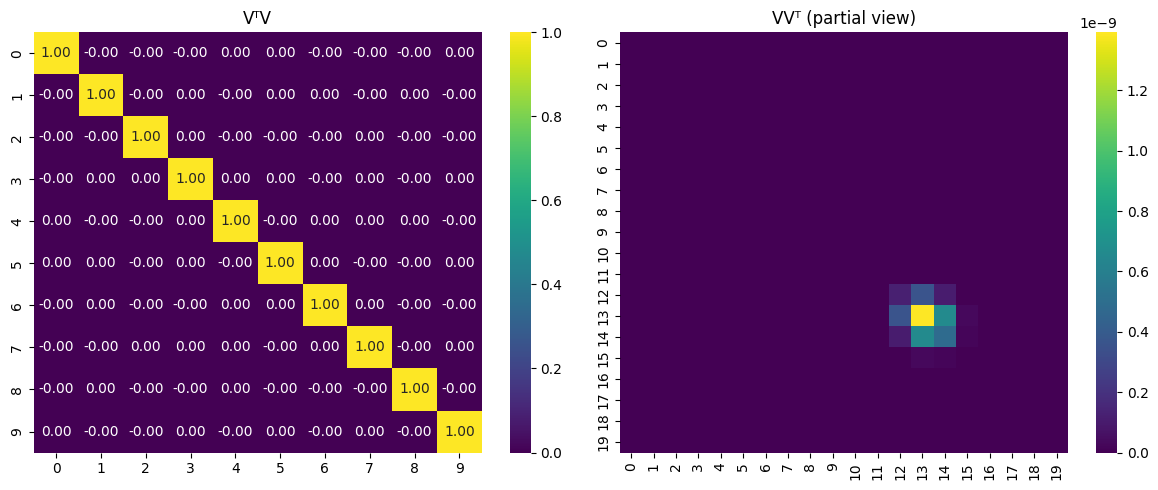

In [18]:
########################
#### YOUR CODE HERE ####
########################
import matplotlib.pyplot as plt
import seaborn as sns


X_centered = X - np.mean(X, axis=0)
cov_matrix = np.cov(X_centered, rowvar=False)
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)
sorted_indices = np.argsort(eig_vals)[::-1]
V = eig_vecs[:, sorted_indices[:10]]

# V^T V
VtV = np.dot(V.T, V)

# V V^T
VVt = np.dot(V, V.T)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(VtV, annot=True, fmt=".2f", cmap="viridis")
plt.title("VᵀV")

plt.subplot(1, 2, 2)
sns.heatmap(VVt[:20, :20], cmap="viridis")
plt.title("VVᵀ (partial view)")

plt.tight_layout()
plt.show()


Your Explanation:

**Answer:**
In PCA, the matrix
$V\in \mathbb{R}^{d\times r}$
  contains the top r principal components (as column vectors).<br>
  $V^TV$ is an
$r×r$
 matrix that checks whether the principal components are orthonormal.
In an ideal PCA, we get
$V^TV$
=
𝐼
𝑟
, meaning the components are orthogonal and unit-length.
<br>
$VV^T$
  is a $d×d$ projection matrix that maps any original vector in
$\mathbb{R}^{d}$
  onto the subspace spanned by the principal components.
It is often used for reconstructing or projecting data back into the original space.



Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [19]:
def pca_reconstruction(x, n_dimentions):
    #### YOUR CODE HERE ####

    x_centered = x - np.mean(pca.X_fit_, axis=0)


    V_reduced = pca.V[:, :n_dimentions]


    x_projected = np.dot(x_centered, V_reduced)


    x_reconstructed = np.dot(x_projected, V_reduced.T)


    x_reconstructed += np.mean(pca.X_fit_, axis=0)

    return x_reconstructed

Now write code that samples a random image from the dataset, and uses the function above to project it into n-dimensional space and reconstruct it to the original space. <br><br>
Is the reconstructed image the original image?
<br><br>

Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


**Answer:** As you can see - Not exactly.
PCA reduces information — so reconstruction from a limited space loses detail.
But as you increase the number of components (dimensions), the reconstruction improves and gets closer to the original image.

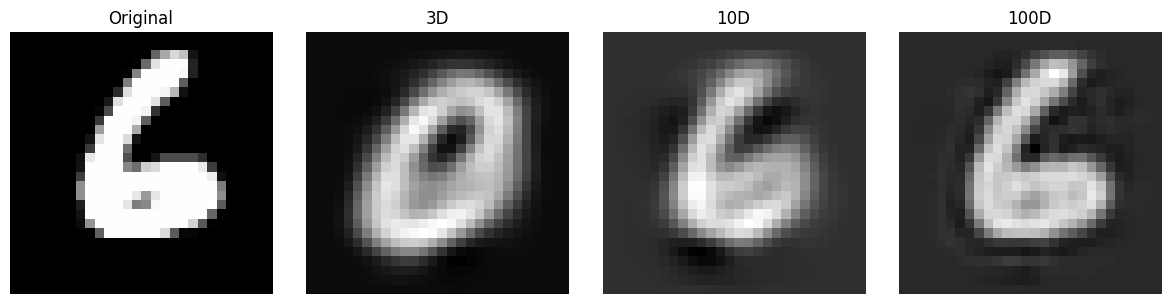

In [20]:
########################
#### YOUR CODE HERE ####
########################

idx = np.random.randint(0, X.shape[0])
x_original = X[idx]


dims = [3, 10, 100]
reconstructions = []

for dim in dims:
    x_reconstructed = pca_reconstruction(x_original, dim)
    reconstructions.append(x_reconstructed)


plt.figure(figsize=(12, 3))


plt.subplot(1, 4, 1)
plt.imshow(x_original.reshape(28, 28), cmap='gray')
plt.title("Original")
plt.axis('off')


for i, (dim, x_rec) in enumerate(zip(dims, reconstructions)):
    plt.subplot(1, 4, i+2)
    plt.imshow(x_rec.reshape(28, 28), cmap='gray')
    plt.title(f"{dim}D")
    plt.axis('off')

plt.tight_layout()
plt.show()


equal_check = np.allclose(x_original, reconstructions[-1])



## Part 3 - Convolutional Neural Networks (30%)

This part is related to the NN implementation from HW4, so pay attention.
In this section, we are going to implement a convolutional neural network (CNN) and train it on the mnist dataset. It will be very similar to what you did in the previous sections but now we use new layers like ```convolution```and ```pooling```.  
To get started, copy all parts from Ex4 into this section.

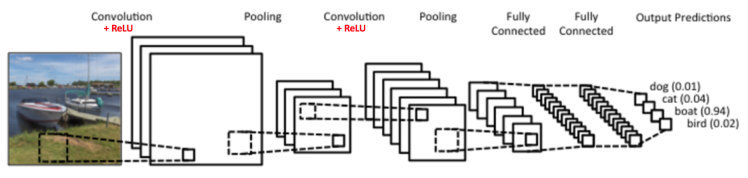

Reminder:  
Go over this **[article](https://cs231n.github.io/convolutional-networks/)** to better understand convolutional neural networks.

- **Convolutional operation:** A “filter”, also called a “kernel”, is passed over the image, viewing a few pixels at a time (for example, 3X3 or 5X5). The convolution operation is a dot product of the original pixel values with weights defined in the filter. The results are summed up into one number that represents all the pixels the filter observed.

- **Pooling:** “Pooling” is the process of further downsampling and reducing the size of the matrix. A filter is passed over the results of the previous layer and selects one number out of each group of values (typically the maximum, this is called max pooling). This allows the network to train much faster, focusing on the most important information in each feature of the image. By sliding the window along the image, we compute the mean or the max of the portion of the image inside the window in case of MeanPooling or MaxPooling.

- **Stride:** The number of pixels to pass at a time when sliding the convolutional kernel.

- **Padding:** To preserve exactly the size of the input image, it is useful to add zero padding on the border of the image.

**How do we compute the output size of a convolutional layer?**

input:
- An image of dimensions $W_{in}×H_{in}$.
- A filter of dimensions $K \times K$.
- Stride $S$
- padding $P$

$$W_{out} = \left\lfloor\frac{W_{in} - F + 2P}{S}\right\rfloor + 1$$
<br>
$$H_{out} = \left\lfloor\frac{H_{in} - F + 2P}{S}\right\rfloor + 1$$

**Q1:** Given an image with shape [1,28,28], what will be the shape of the output of a convolution layer with 10 5x5 kernels (filters), with stride of 1, and without padding?

**A1:**
<font color='red'>
YOUR ANSWER WITH EXPLANATIONS HERE! (3 points)
</font>
<br>
$W_{in}= 28 - image-dim $ <br>
F = 5 - kernel dim <br>
P = 0 - padding <br>
S = 1 - stride <br>
$$W_{out} = \left\lfloor\frac{28 - 5 + 0}{1}\right\rfloor + 1 = 24$$
Each 5×5 filter reduces the image by 4 pixels in each dimension (28→24), and there are 10 such filters ⇒ 10 channels in the output.<br>
so [10, 24, 24]



**Q2:** We would like our convolution layer to output a volume with the same shape as the input image. So input_shape and output_shape will be [1,28,28]. What should be the padding (assume 5x5 filter and stride of 1)?

**A2:**
<font color='red'>
YOUR ANSWER WITH EXPLANATIONS HERE! (2 points)
</font>
<br>
we want that the output will be 28
$W_{in}= 28 - image-dim $ <br>
F = 5 - kernel dim <br>
S = 1 - stride <br>
$$W_{out} = \left\lfloor\frac{28 - 5 + 2P}{1}\right\rfloor + 1 = 28$$
so p = 2.<br>
 Padding of 2 pixels on each side ensures that the 5×5 filters keep the output size equal to the input size.

**Q3:** Consider an input image with shape [1, 28, 28]. You apply two consecutive convolution layers. The first convolution layer uses 20 filters, each of size 3x3, with a stride of 1 and no padding. The second convolution layer uses 15 filters, each of size 3x3, with a stride of 3 and padding of 2. What will be the shape of the output after these two convolution layers?

**A3:**
<font color='red'>
YOUR ANSWER WITH EXPLANATIONS HERE! (4 points)
</font>
<br>
first layer:<br>
$W_{in}= 28 - image-dim $ <br>
F = 3 - kernel dim <br>
P = 0 - padding <br>
S = 1 - stride <br>
$$W_{1} = \left\lfloor\frac{28 - 3 + 0}{1}\right\rfloor + 1 = 26$$<br>
second layer:<br>
$W_{in}= 26 - image-dim $ <br>
F = 3 - kernel dim <br>
P = 2 - padding <br>
S = 3 - stride <br>
$$W_{2} = \left\lfloor\frac{26 - 3 + 2*2}{3}\right\rfloor + 1 = 10$$

First layer reduces size from 28→26, produces 20 channels.<br>
Second layer increases padding to preserve size before stride-3 downsampling, and outputs 15 channels of size 10×10<br>
so [15, 10, 10]



Let's create a simple Convolutional neural network.
The architecture:  
**Conv layer** (10 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Conv layer** (20 5x5 Kernels) -> **Max Pooling** (2x2 kernel) -> **Relu** -> **Hidden layer** (320 units) -> **Relu** -> **Hidden layer** (50 units) -> **Output layer** (10 outputs).

In [21]:
import numpy as np
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False, parser='auto')
print(X.shape, y.shape)

"""Data normalization"""

## TODO: Normalize the dataset according to Min-Max normalization.
def min_max_norm(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    diff = X_max - X_min
    diff[diff == 0] = 1
    return (X - X_min) / diff


X = min_max_norm(X)

"""Split the data into Train set (80%) and a Test set (20%)"""

## TODO: Split the data into Train set (80%) and Test set (20%)

indices = np.random.permutation(len(X))
split_index = int(0.8 * len(X))

X_train = X[indices[:split_index]]
X_test = X[indices[split_index:]]
y_train = y[indices[:split_index]]
y_test = y[indices[split_index:]]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

"""### **Useful functions (7 points)**

Activation function - Sigmoid
"""

## TODO: Implement the sigmoid activation function and its derivative
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
  s = sigmoid(z)
  return s * (1 - s)

"""Softmax function"""

## TODO: Implement the softmax function
def softmax(z):
    z = z - np.max(z)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z)

"""Loss function"""

# Negative Log Likelihood loss function for multiclass
# Receive y_pred, which is a (10,) vector containing probability predictions, and y_true,
# which is a one-hot (10,) vector with the value of 1 only at the correct class index and zeros elsewhere.
def nll_loss(y_pred, y_true):
  loss = -np.sum(y_true * np.log(y_pred), dtype=np.float64)
  return loss / y_pred.shape[0]

"""### **Multilayer Perceptron (24 points)**

Hyper-Parameters
"""

## TODO: Define the hyper-parameters that you will need for your model
# Note that the MNIST dataset has 10 classes.
# input_layer = ... # 28X28 = 784
# hidden_layer = ...
# output_layer = ...
# learning_rate = ...
# epochs = ...

# Your code here

input_layer = 784
hidden_layer = 64
output_layer = 10
learning_rate = 0.1
epochs = 5

"""Multilayer Perceptron class with train and test functions."""

class MultilayerPerceptron:
  def __init__(self, input_layer, hidden_layer, output_layer, learning_rate, epochs):
    ## TODO: Initialize the parameters.
    ## Note that the MNIST dataset has 10 classes.

    ######################
    ### YOUR CODE HERE ###
    ######################
    self.W1 = np.random.randn(hidden_layer, input_layer) * 0.01
    self.b1 = np.zeros((hidden_layer, 1))
    self.W2 = np.random.randn(output_layer, hidden_layer) * 0.01
    self.b2 = np.zeros((output_layer, 1))
    ######################

    # Hyperparameters
    self.learning_rate = learning_rate
    self.epochs = epochs

  def forward(self, X):
    ## TODO: Implement the forward pass.

    ######################
    ### YOUR CODE HERE ###
    ######################
    Z1 = np.dot(self.W1, X) + self.b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(self.W2, A1) + self.b2

    A2 = softmax(Z2)
    ######################

    return Z1, A1, Z2, A2

  # Back propagation - compute the gradients of each parameter
  def backward(self, X, Y, Z1, A1, Z2, A2):
    ## TODO: Implement the backward pass, Back propagation - compute the gradients of each parameter.

    ######################
    ### YOUR CODE HERE ###
    ######################
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(self.W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    ######################

    # TODO: Gradient descent parameter update
    ######################
    ### YOUR CODE HERE ###
    ######################
    self.W1 -= self.learning_rate * dW1
    self.b1 -= self.learning_rate * db1
    self.W2 -= self.learning_rate * dW2
    self.b2 -= self.learning_rate * db2
    ######################

  def train(self, X_train, y_train):
    train_size = len(X_train)

    for epoch in range(self.epochs):
      total_epoch_loss = 0
      for i in range(train_size):

        # Reshape image i to be (784x1)
        x_i = X_train[i].reshape(-1, 1)
        Z1, A1, Z2, A2 = self.forward(x_i)

        # TODO: Define y_true as a zero vector with the shape (10, 1),
        # and place a '1' at the index specified by int(y_train[i]).
        # For example when int(y_train[i])=4, then y_true should be (0,0,0,0,1,0,0,0,0,0)
        ######################
        ### YOUR CODE HERE ###
        ######################
        y_true = np.zeros((10,1))
        y_true[int(y_train[i])] = 1
        #...
        ######################

        loss = nll_loss(A2, y_true)
        total_epoch_loss += loss
        self.backward(x_i, y_true, Z1, A1, Z2, A2)
      print(f"Epoch {epoch+1}/{self.epochs}, Average Loss: {total_epoch_loss/train_size}")

  def test(self, X_test, y_test):
    true_predictions = 0

    # TODO: test your model and print the accuracy on the test set
    ######################
    ### YOUR CODE HERE ###
    ######################
    test_size = len(X_test)
    for i in range(test_size):
      x_i = X_test[i].reshape(-1,1)
      _, _, _, A2 = self.forward(x_i)
      #...
      pred = np.argmax(A2)
      if pred == int(y_test[i]):
          true_predictions += 1
    accuracy = true_predictions / test_size
    ######################

    print(f"Accuracy: {accuracy}")

"""#### **Train**"""

# TODO: Define your mlp model with all the parameters
######################
### YOUR CODE HERE ###
######################
#mlp = MultilayerPerceptron(input_layer=..., hidden_layer=..., output_layer=..., learning_rate=..., epochs=...)
######################

mlp = MultilayerPerceptron(
    input_layer=784,
    hidden_layer=64,
    output_layer=10,
    learning_rate=0.1,
    epochs=5
)

# Train your model
mlp.train(X_train, y_train)

"""#### **Test**

Accuracy should be more than **0.8** !
"""

mlp.test(X_test, y_test)

(70000, 784) (70000,)
(56000, 784) (14000, 784) (56000,) (14000,)
Epoch 1/5, Average Loss: 0.027216913682220394
Epoch 2/5, Average Loss: 0.013424611357400704
Epoch 3/5, Average Loss: 0.010300405993647763
Epoch 4/5, Average Loss: 0.008688043605737846
Epoch 5/5, Average Loss: 0.007139669321336525
Accuracy: 0.9658571428571429


Python 3.11.13
Mounted at /content/drive


100%|██████████| 26.4M/26.4M [00:01<00:00, 17.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 271kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 4.40MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.4MB/s]


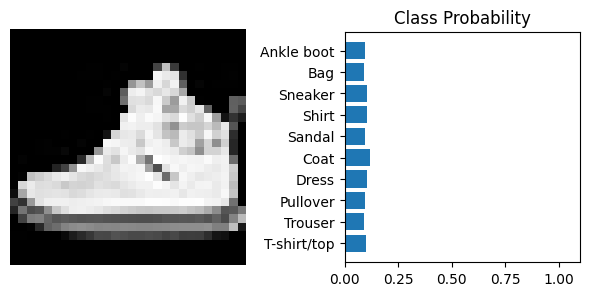

Predicted Label: 4
Confidence: 0.1192
Epoch: 1/5..  Training Loss: 1.455..  Validation Loss: 0.838.. 
Epoch: 2/5..  Training Loss: 0.719..  Validation Loss: 0.644.. 
Epoch: 3/5..  Training Loss: 0.605..  Validation Loss: 0.572.. 
Epoch: 4/5..  Training Loss: 0.549..  Validation Loss: 0.530.. 
Epoch: 5/5..  Training Loss: 0.514..  Validation Loss: 0.502.. 


In [22]:
# check python version
!python --version

# Commented out IPython magic to ensure Python compatibility.
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the code and datasets.
# Recommended path: 'machine_learning/assignments/assignment5/'
FOLDERNAME = 'machine_learning/assignments/'
ASSIGNMENTNAME = 'assignment4'

# %cd drive/My\ Drive
# %cp -r $FOLDERNAME/$ASSIGNMENTNAME ../../
# %cd ../../
import torch
import numpy as np
from torchvision import datasets, transforms
import matplotlib
import matplotlib.pyplot as plt

data_path = "./FashionMNIST_data"

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
label_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Download and load the data
mnist_data = datasets.FashionMNIST(data_path, download=True, train=True, transform=transform)
mnist_dataloader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

"""Using the ```mnist_data``` (dataset) and ```mnist_dataloader``` (batch dataloader):
1. Print the number of samples in the whole dataset.
2. Print the number of samples in a single batch.
3. Print the shape of images in the data.
4. Print the number of labels in the dataset (targets).
5. Plot 3 random images using matplotlib (```plt.imshow```) and print their labels.
"""

# get single batch
dataiter = iter(mnist_dataloader)
batch_images, batch_labels = next(dataiter)
from torch import nn, optim
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        '''
        Declare layers for the model
        '''
        super().__init__()
        # TODO
        ######################
        ### YOUR CODE HERE ###
        ######################
        super().__init__()

        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

        self.relu = nn.ReLU()
        self.logsoftmax = nn.LogSoftmax(dim=1)
        pass

    def forward(self, x):
        ''' Forward pass through the network, returns log_softmax values '''
        # TODO
        ######################
        ### YOUR CODE HERE ###
        ######################
        ''' Forward pass through the network, returns log_softmax values '''
        # flatten the input: from [batch_size, 1, 28, 28] to [batch_size, 784]
        x = x.view(x.shape[0], -1)

        # pass through layers
        x = self.relu(self.fc1(x))     # 784 -> 128 -> ReLU
        x = self.relu(self.fc2(x))     # 128 -> 64 -> ReLU
        x = self.logsoftmax(self.fc3(x))  # 64 -> 10 -> LogSoftmax

        return x

model = NeuralNetwork()
model
def view_classify(img, ps, version="MNIST"):
    '''
    Function for viewing an image and its predicted classes.
    img - the input image to the network
    ps - the class confidences (network output)
    '''
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='Greys_r')
    ax1.axis('off')

    # Setting the y-ticks for the bar chart
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))  # Numeric y-ticks for positioning

    # Using set_yticklabels to assign string labels to y-ticks
    if version == "MNIST":
        ax2.set_yticklabels(label_names)

    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()
    plt.show()

def random_prediction_example(data_loader, model):
  '''
  The function sample an image from the data, pass it through the model (inference)
  and show the prediction visually. It returns the predictions confidences.
  '''
  # take a batch and randomly pick an image
  dataiter = iter(data_loader)
  images, labels = next(dataiter)
  images.resize_(64, 1, 784)
  img = images[0]

  # Forward pass through the network
  # we use torch.no_grad() for faster inference and to avoid gradients from
  # moving through the network.
  with torch.no_grad():
      ps = model(img)
      # the network outputs log-probabilities, so take exponential for probabilities
      ps = torch.exp(ps)

  # visualize image and prediction
  view_classify(img.view(1, 28, 28), ps)
  return ps

# you can run this cell multiple times for different images
preds_conf = random_prediction_example(mnist_dataloader, model)

"""Print the prediction"""

# TODO: Print the prediction of the network for that sample (preds_conf)
######################
### YOUR CODE HERE ###
######################
predicted_label = torch.argmax(preds_conf).item()


predicted_confidence = preds_conf[0][predicted_label].item()

print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {predicted_confidence:.4f}")

"""### **4. Neural Network - Training (40 points)**

We can now train and evaluate our network.
1. Split the dataset into a training set and a validation set. Train-set size: 80% of the total data. Val-set size: the rest 20%.
2. Create a dataloader for each set (```train_loader``` and ```val_loader```, see Section 2 for examples).
3. Choose hyperparameters (for now we choose ```learning_rate=0.005``` and ```num_epochs=5```).
4. Use SGD (Stochastic Gradient Descent) as the optimizer.
5. Since it is a multi-class classification task, use "negative log-likelihood loss" as the loss criterion.
6. Train your model on the train-set and evaluate it on the validation-set.
7. During training, for each epoch, track the training loss and validation loss.
"""

from torch.utils import data

# TODO: 1. split trainset into train and validation (use torch.utils.data.random_split())
######################
### YOUR CODE HERE ###
######################
train_set = mnist_data
train_size = int(0.8 * len(train_set))
val_size = len(train_set) - train_size

train_subset, val_subset = data.random_split(train_set, [train_size, val_size])

# TODO: 2.1. create data loader for the trainset (batch_size=64, shuffle=True)
######################
### YOUR CODE HERE ###
######################
# train_loader = ...
train_loader = data.DataLoader(train_subset, batch_size=64, shuffle=True)

# TODO: 2.2. create data loader for the valset (batch_size=64, shuffle=False)
######################
### YOUR CODE HERE ###
######################
# val_loader = ...
val_loader = data.DataLoader(val_subset, batch_size=64, shuffle=False)

# 3. set hyper parameters
learning_rate = 0.005
nepochs = 5

model = NeuralNetwork()

# TODO: 4. create sgd optimizer. It should optimize our model parameters with
#    learning_rate defined above
######################
### YOUR CODE HERE ###
######################
# optimizer = ...
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# TODO: 5. create a criterion object. It should be negative log-likelihood loss since the task
#    is a multi-task classification (digits classification)
######################
### YOUR CODE HERE ###
######################
# criterion = ...
criterion = nn.NLLLoss()

# 6.1. Train the model. (Fill empty code blocks)
def train_model(model, optimizer, criterion,
                nepochs, train_loader, val_loader, is_image_input = False):
  '''
  Train a pytorch model and evaluate it every epoch.
  Params:
  model - a pytorch model to train
  optimizer - an optimizer
  criterion - the criterion (loss function)
  nepochs - number of training epochs
  train_loader - dataloader for the trainset
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array.
                                Should be True for Neural Networks
                                but False for Convolutional Neural Networks.
  '''
  train_losses, val_losses = [], []
  for e in range(nepochs):
      running_loss = 0
      running_val_loss = 0
      for images, labels in train_loader:
          if is_image_input:
            # Flatten Fashion-MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

          # Training pass
          model.train() # set model in train mode

          # TODO: Compute the loss and do the backward and optimizer step
          ######################
          ### YOUR CODE HERE ###
          ######################
          optimizer.zero_grad()
          outputs = model(images)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
      else:
          val_loss = 0
          # 6.2 Evalaute model on validation at the end of each epoch.
          with torch.no_grad():
              for images, labels in val_loader:
                  if is_image_input:
                    # Flatten Fashion-MNIST images into a 784 long vector
                    images = images.view(images.shape[0], -1)
                  model.eval() # set model in evaluation mode

                  # TODO: compute the Validation Loss
                  ######################
                  ### YOUR CODE HERE ###
                  ######################
                  # val_loss = ...
                  ######################
                  outputs = model(images)
                  val_loss = criterion(outputs, labels)


                  running_val_loss += val_loss.item()

          # 7. track train loss and validation loss
          train_losses.append(running_loss/len(train_loader))
          val_losses.append(running_val_loss/len(val_loader))

          print("Epoch: {}/{}.. ".format(e+1, nepochs),
                "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
                "Validation Loss: {:.3f}.. ".format(running_val_loss/len(val_loader)))
  return train_losses, val_losses

# 6.1. Train the model.
  ## NOTE: Do not run this cell continuously without running the two cells above!
  ##       Otherwise, you might train a model you have already trained.
  ##       So make sure to run the two cells above (to first initialize the model
  ##       and optimizer), every time, before running this cell!
train_losses, val_losses = train_model(model, optimizer, criterion, nepochs,
                                       train_loader, val_loader, is_image_input=True)
def evaluate_model(model, val_loader, is_image_input=False):
  '''
  Evaluate a model on the given dataloader.
  Params:
  model - a pytorch model to train
  val_loader - dataloader for the valset
  is_image_input (default False) - If false, flatten 2d images into a 1d array.
                                   Should be True for Neural Networks
                                   but False for Convolutional Neural Networks.
  '''
  validation_accuracy = 0
  with torch.no_grad():
      model.eval()
      for images, labels in val_loader:
          if is_image_input:
            # flatten Fashion-MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)
          # forward pass
          test_output = model(images)
          ps = torch.exp(test_output)
          top_p, top_class = ps.topk(1, dim=1)
          # count correct predictions
          equals = top_class == labels.view(*top_class.shape)
          validation_accuracy += torch.sum(equals.type(torch.FloatTensor))
  res = validation_accuracy/len(val_loader.dataset)
  return res

In [23]:
class ConvolutionalNet(nn.Module):
    def __init__(self):
        super(ConvolutionalNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = self.conv1(x) # conv 1
        x = F.max_pool2d(x, 2) # max pooling 1
        x = F.relu(x) # relu
        x = self.conv2(x) # conv 2
        x = F.max_pool2d((x), 2) # max pooling 2
        x = F.relu(x) # relu
        x = x.view(-1, 320) # flatten input
        x = self.fc1(x) # hidden layer 1
        x = F.relu(x) # relu
        x = self.fc2(x) # hidden layer 2
        return F.log_softmax(x, dim=1) #output

cnn_model = ConvolutionalNet()
print(cnn_model)

ConvolutionalNet(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


We can now train the model on the train set.

In [24]:
# set hyperparameters
cnn_nepochs = 3
cnn_learning_rate = 0.03

In [25]:
# train the conv model
cnn_model = ConvolutionalNet()
# create sgd optimizer
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=cnn_learning_rate)
# create negative log likelihood loos
cnn_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(cnn_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader, is_image_input=False)

Epoch: 1/3..  Training Loss: 0.892..  Validation Loss: 0.577.. 
Epoch: 2/3..  Training Loss: 0.524..  Validation Loss: 0.452.. 
Epoch: 3/3..  Training Loss: 0.436..  Validation Loss: 0.414.. 


In [26]:
# evaluate on the validation set
print(f"Validation accuracy: {evaluate_model(cnn_model, val_loader, is_image_input=False)}")

Validation accuracy: 0.8496666550636292


You should probably see that our CNN performs better on the validation set compared to the simple neural network (within 3 epochs only!) :)

___________

Now it's your turn: Use the code above and create a convolutional neural network that achieves the best accuracy on the validation set.
Note that you must use only the Fashion-MNIST training set as we did earlier:
```mnist_data = datasets.FashionMNIST(data_path, download=True, train=True, transform=transform)```

**Using any other or additional data from the test set will result in point deductions (without any bonus)!**

You should consider changing (change at least 4 things):  
1. Network architecture:
  - Number of convolutional layers
  - Number of kernels (filters) for each convolutional layer
  - Size of each kernel on each layer
  - Number of hidden layers (fully connected)
  - Number of units for each hidden layer
  - Usage of layers like BatchNormalization and Dropout.
  - Usage of max pooling (or maybe other pooling strategies)

2. Training hyperparameters:
  - Learning rate
  - Optimizer (SGD with momentum, adam, etc)
  - Number of epochs

To get full points in this part: make sure you implement the model architecture correctly, train the model properly, use the optimizer effectively, and ensure your validation accuracy is greater than 80%. **(4 points for this part)**

In [27]:
## TODO: Prepocess
######################
### YOUR CODE HERE ###
######################
data_path = "./FashionMNIST_data_CNN"

# Define a transform to normalize the data
# transform = transforms.Compose([transforms.ToTensor(),
#                               ...
#                               ])
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the data
mnist_data = datasets.FashionMNIST(data_path, download=True, train=True, transform=transform)
mnist_dataloader = torch.utils.data.DataLoader(mnist_data, batch_size=64, shuffle=True)

# split trainset into train (80%) and validation (20%)
# ...
# train_loader = ...
# val_loader = ...
train_size = int(0.8 * len(mnist_data))
val_size = len(mnist_data) - train_size
train_data, val_data = torch.utils.data.random_split(mnist_data, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 263kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.00MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.8MB/s]


In [30]:
# TODO: Find network and hyperparams that achieve best validation accuracy as possible
######################
### YOUR CODE HERE ###
######################
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class ConvolutionalNet1(nn.Module):
    def __init__(self):
        super(ConvolutionalNet1, self).__init__()
        # 3 convulotion layers with BatchNorm, different number of kernels
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)  # 28x28 -> 28x28
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # 28x28 -> 28x28
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # 28x28 -> 28x28
        self.bn3 = nn.BatchNorm2d(128)

        self.pool = nn.MaxPool2d(2, 2)  # Usage of max pooling

        self.dropout = nn.Dropout(0.25)

        # 28 -> 14 -> 7 -> 3
        self.fc1 = nn.Linear(128 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # 28x28 -> 14x14
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # 14x14 -> 7x7
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # 7x7 -> 3x3
        x = self.dropout(x)
        x = x.view(-1, 128 * 3 * 3)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [31]:
# TODO: Save the best model in this variable and evaluate on the validation set
######################
### YOUR CODE HERE ###
######################
#best_model = ...
#print(f"Validation accuracy: {evaluate_model(best_model, val_loader, is_image_input=False)}")
best_model = ConvolutionalNet1()

cnn_nepochs = 3
# different learning rate
cnn_learning_rate = 0.001

# different optimizer
cnn_optimizer = optim.Adam(best_model.parameters(), lr=cnn_learning_rate)
cnn_criterion = nn.NLLLoss()

train_losses, val_losses = train_model(best_model, cnn_optimizer, cnn_criterion,
                                       cnn_nepochs, train_loader, val_loader)
print(f"Validation accuracy: {evaluate_model(best_model, val_loader, is_image_input=False)}")


Epoch: 1/3..  Training Loss: 0.455..  Validation Loss: 0.288.. 
Epoch: 2/3..  Training Loss: 0.303..  Validation Loss: 0.260.. 
Epoch: 3/3..  Training Loss: 0.263..  Validation Loss: 0.225.. 
Validation accuracy: 0.9174166917800903


When you are satisfied with your model performance on the validation set, load the test set given to you (**important** - apply any transformation you applied to the train set before) - [FashionMNIST_test.pth](https://drive.google.com/file/d/1FeOaoRU-tkhOiKzsK_UZNwbNPaRqaDVu/view?usp=sharing), into your drive assignment folder (e.g "machine_learning/assignments/assignment5/FashionMNIST_test.pth"), and write the model predictions for each test sample to a file called "predictions.txt". You can use the code below.


**Download the "predictions.txt" file to your computer, and then upload it to the "submit" system with this notebook in one zip file named ex4.zip**

Ensure each prediction is printed in a new line.

For Example ("predictions.txt"):
```
0  
5  
9
```

<font color='blue'><b>
Note: Bonus points will be given for the top 10 submissions having the highest test accuracy:
- Top 1-3 get 5 points
- Top 4-6 get 3 points
- top 7-10 get 2 points  
</b></font>  

In [32]:
def predict_and_save(model, test_path, file_name):
  # load mnist test data
  mnist_test_data = torch.utils.data.TensorDataset(torch.load(test_path))

  ## TODO: Prepocess the test set (i.e apply the transform to normalize the test set as you did to your train set)
  ######################
  ### YOUR CODE HERE ###
  ######################
  model.eval()  # set model to eval mode
  # Load the raw test data (tensors)
  test_images = torch.load(test_path)  # Expected to be a single tensor of shape (N, 1, 28, 28)

  # Normalize the test set manually (like in training: mean=0.5, std=0.5)
  test_images = (test_images - 0.5) / 0.5  # Equivalent to Normalize((0.5,), (0.5,))

  # Wrap in a TensorDataset
  mnist_test_data = torch.utils.data.TensorDataset(test_images)


  # create a dataloader
  mnist_test_loader = torch.utils.data.DataLoader(mnist_test_data, batch_size=1, shuffle=False)
  # make a prediction for each batch and save all predictions in total_preds
  total_preds = torch.empty(0, dtype=torch.long)
  for imgs in mnist_test_loader:
    log_ps = model(imgs[0])
    ps = torch.exp(log_ps)
    _, top_class = ps.topk(1, dim=1)
    total_preds = torch.cat((total_preds, top_class.reshape(-1)))
  total_preds = total_preds.cpu().numpy()
  # write all predictions to a file
  with open(file_name,"w") as pred_f:
    for pred in total_preds:
      pred_f.write(str(pred) + "\n")


In [33]:
predict_and_save(best_model, test_path=f"/content/drive/MyDrive/machine_learning/assignments/assignment4/FashionMNIST_test.pth", file_name="predictions.txt")

In [34]:
from google.colab import files
files.download('predictions.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>